In [224]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [225]:
#Load the data
data=pd.read_csv("Train.csv")

In [226]:
#Display first 10 rows of the dataset
data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Income,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,834,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1597,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1771,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,1093,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,634,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,628,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,875,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,890,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,1678,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,572,1.0,Average,4.0,Cat_6,C


In [227]:
#Display the numbers of rows & columns
data.shape

(8068, 12)

In [228]:
#Display the datatypes of the column
data.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Income               int64
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [229]:
#drop unwanted columns
data1 = data.drop(["ID","Segmentation","Var_1"],axis = 1)
data1.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Income               int64
Work_Experience    float64
Spending_Score      object
Family_Size        float64
dtype: object

In [230]:
#Lable Encoding
genderEncode = {'Male':0, 'Female':1}
data1.Gender = data1.Gender.map(genderEncode)

MarriedEncode = {'No':0, 'Yes':1}
data1.Ever_Married = data1.Ever_Married.map(MarriedEncode)

GraduatedEncode = {'No':0, 'Yes':1}
data1.Graduated = data1.Graduated.map(GraduatedEncode)

Spending_ScoreEncode = {'Low':1, 'Average':2, 'High':3}
data1.Spending_Score = data1.Spending_Score.map(Spending_ScoreEncode)

ProfessionEncode = {'Healthcare':1, 'Engineer':2, 'Lawyer':3, 'Entertainment':4, 'Artist':5, 'Executive':6, 'Doctor':7, 'Homemaker':8, 'Marketing':9}
data1.Profession = data1.Profession.map(ProfessionEncode)

data1

,Gender,Ever_Married,Age,Graduated,Profession,Income,Work_Experience,Spending_Score,Family_Size
0,0,0.0,22,0.0,1.0,834,1.0,1,4.0
1,1,1.0,38,1.0,2.0,1597,NaN,2,3.0
2,1,1.0,67,1.0,2.0,1771,1.0,1,1.0
3,0,1.0,67,1.0,3.0,1093,0.0,3,2.0
4,1,1.0,40,1.0,4.0,634,NaN,3,6.0
...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,549,0.0,1,7.0
8064,0,0.0,35,0.0,6.0,1506,3.0,1,4.0
8065,1,0.0,33,1.0,1.0,854,1.0,1,1.0
8066,1,0.0,27,1.0,1.0,803,1.0,1,4.0


In [231]:
data1.dtypes

Gender               int64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Income               int64
Work_Experience    float64
Spending_Score       int64
Family_Size        float64
dtype: object

In [232]:
data1.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Income               0
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

In [233]:
meanExperience = data1['Work_Experience'].mean()
meanExperience

RoundExperience = round(meanExperience)
RoundExperience

3

In [234]:
data1["Work_Experience"].fillna(RoundExperience, inplace = True)
data1

,Gender,Ever_Married,Age,Graduated,Profession,Income,Work_Experience,Spending_Score,Family_Size
0,0,0.0,22,0.0,1.0,834,1.0,1,4.0
1,1,1.0,38,1.0,2.0,1597,3.0,2,3.0
2,1,1.0,67,1.0,2.0,1771,1.0,1,1.0
3,0,1.0,67,1.0,3.0,1093,0.0,3,2.0
4,1,1.0,40,1.0,4.0,634,3.0,3,6.0
...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,549,0.0,1,7.0
8064,0,0.0,35,0.0,6.0,1506,3.0,1,4.0
8065,1,0.0,33,1.0,1.0,854,1.0,1,1.0
8066,1,0.0,27,1.0,1.0,803,1.0,1,4.0


In [235]:
meanFamily = data1['Family_Size'].mean()
meanFamily

RoundFamily = round(meanFamily)
RoundFamily

3

In [236]:
data1["Family_Size"].fillna(RoundFamily, inplace = True)
data1

,Gender,Ever_Married,Age,Graduated,Profession,Income,Work_Experience,Spending_Score,Family_Size
0,0,0.0,22,0.0,1.0,834,1.0,1,4.0
1,1,1.0,38,1.0,2.0,1597,3.0,2,3.0
2,1,1.0,67,1.0,2.0,1771,1.0,1,1.0
3,0,1.0,67,1.0,3.0,1093,0.0,3,2.0
4,1,1.0,40,1.0,4.0,634,3.0,3,6.0
...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,549,0.0,1,7.0
8064,0,0.0,35,0.0,6.0,1506,3.0,1,4.0
8065,1,0.0,33,1.0,1.0,854,1.0,1,1.0
8066,1,0.0,27,1.0,1.0,803,1.0,1,4.0


In [237]:
data2=data1.dropna(axis = 0)
data2

,Gender,Ever_Married,Age,Graduated,Profession,Income,Work_Experience,Spending_Score,Family_Size
0,0,0.0,22,0.0,1.0,834,1.0,1,4.0
1,1,1.0,38,1.0,2.0,1597,3.0,2,3.0
2,1,1.0,67,1.0,2.0,1771,1.0,1,1.0
3,0,1.0,67,1.0,3.0,1093,0.0,3,2.0
4,1,1.0,40,1.0,4.0,634,3.0,3,6.0
...,...,...,...,...,...,...,...,...,...
8062,0,1.0,41,1.0,5.0,549,0.0,3,5.0
8064,0,0.0,35,0.0,6.0,1506,3.0,1,4.0
8065,1,0.0,33,1.0,1.0,854,1.0,1,1.0
8066,1,0.0,27,1.0,1.0,803,1.0,1,4.0


In [238]:
data2.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Income             0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [239]:
#initialize clustering using 3 clusters
kmeans = KMeans(4)

In [240]:
# use the fit methods to perform the clustering
kmeans.fit(data2)

KMeans(n_clusters=4)

In [241]:
#Extract the results
identified_clusters = kmeans.predict(data2)

In [242]:
identified_clusters

array([2, 3, 3, ..., 2, 2, 3])

In [243]:
Data_Cluster=data2.copy()

In [244]:
Data_Cluster['clusterNo']= identified_clusters

In [245]:
Data_Cluster

,Gender,Ever_Married,Age,Graduated,Profession,Income,Work_Experience,Spending_Score,Family_Size,clusterNo
0,0,0.0,22,0.0,1.0,834,1.0,1,4.0,2
1,1,1.0,38,1.0,2.0,1597,3.0,2,3.0,3
2,1,1.0,67,1.0,2.0,1771,1.0,1,1.0,3
3,0,1.0,67,1.0,3.0,1093,0.0,3,2.0,2
4,1,1.0,40,1.0,4.0,634,3.0,3,6.0,0
...,...,...,...,...,...,...,...,...,...,...
8062,0,1.0,41,1.0,5.0,549,0.0,3,5.0,0
8064,0,0.0,35,0.0,6.0,1506,3.0,1,4.0,1
8065,1,0.0,33,1.0,1.0,854,1.0,1,1.0,2
8066,1,0.0,27,1.0,1.0,803,1.0,1,4.0,2


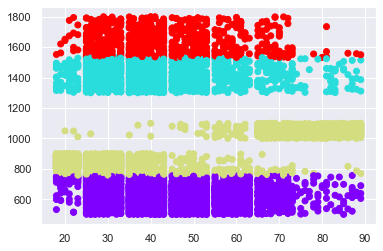

In [246]:
#Plot the data
plt.scatter(Data_Cluster['Age'],Data_Cluster['Income'],c=Data_Cluster['clusterNo'],cmap='rainbow')

In [252]:
import pickle

pickle.dump(kmeans,open('FDM_kmeans.pkl','wb'))

In [253]:
kmeans_model=pickle.load(open('FDM_kmeans.pkl','rb'))

In [254]:
data_t=data2.iloc[1,:]
data_t

Gender                1.0
Ever_Married          1.0
Age                  38.0
Graduated             1.0
Profession            2.0
Income             1597.0
Work_Experience       3.0
Spending_Score        2.0
Family_Size           3.0
Name: 1, dtype: float64

In [255]:
test=np.array(data_t).reshape(1,-1)
test

array([[1.000e+00, 1.000e+00, 3.800e+01, 1.000e+00, 2.000e+00, 1.597e+03,
        3.000e+00, 2.000e+00, 3.000e+00]])

In [256]:
kmeans_model.predict(test)

array([3])